In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
########### Akira ###########

# Leitura do txt com encoding latin e pular bad lines. No caso, so teve 2 bad line.
df = pd.read_csv(r'consulta_cand_2014_SP.csv', encoding='latin-1',sep=';', error_bad_lines=False)

# Deixar a coluna de titulo como string para dar match com os dados de votacao 
df.NR_TITULO_ELEITORAL_CANDIDATO = df.NR_TITULO_ELEITORAL_CANDIDATO.astype(str)

# Criar dicionario mapeando do numero do titulo no nome do candidato
titulo2nomeurna = dict(zip(df.NR_TITULO_ELEITORAL_CANDIDATO,df.NM_URNA_CANDIDATO))
titulo2nome = dict(zip(df.NR_TITULO_ELEITORAL_CANDIDATO,df.NM_CANDIDATO))

# Criar um par key value para a coluna 0 de municipio
titulo2nomeurna['mun'] = 'mun'
titulo2nome['mun'] = 'mun'

In [236]:
M = pd.read_csv('dados_1994.csv',index_col=0)
M.columns = M.columns.to_series().map(titulo2nomeurna)

In [237]:
# Rótulo de linha = município
# Coluna = candidato
M

,RICARDO TRIPOLI,ADRIANO DIOGO,PAULO FREIRE,ROBERTO FREIRE,PAULO MALUF,RICARDO IZAR,VINICIUS CARVALHO,ROBERTO SANTIAGO,ARLINDO CHINAGLIA,CELSO RUSSOMANNO,WALTER IHOSHI,TIRIRICA,GUILHERME CAMPOS,DR SINVAL MALHEIROS,DELEGADA GRACIELA,MISSIONÁRIO JOSÉ OLÍMPIO,HERCULANO PASSOS,MIGUEL HADDAD,JUNJI ABE,THAME,DUARTE NOGUEIRA,ROBERTO DE LUCENA,NEWTON LIMA,LOBBE NETO,SILVIO TORRES,EDUARDO CURY,AMELIA NAOMI,MILTON MONTI,VITOR LIPPI,ADAUTO SCARDOELLI,ROBERTO ALVES,LUIZ CARLOS MOTTA,JOÃO DADO,VANDERLEI MACRIS,EDINHO ARAUJO,PAULINHO DA FORÇA,SAMUEL MOREIRA,PROFESSOR FLAUDIO,ANA PERUGINI,ARNALDO FARIA DE SÁ,PAULO TEIXEIRA,MAJOR OLIMPIO GOMES,WALTER VICIONI,FLORIANO PESARO,ARNALDO JARDIM,PENNA,OTA,CONTE LOPES,DEVANIR RIBEIRO,JOSÉ MENTOR,LUIZA ERUNDINA,MARA GABRILLI,VANDERLEI SIRAQUE,IVAN VALENTE,JEFFERSON CAMPOS,PAPA,CARLOS SAMPAIO,SALVADOR ZIMBALDI,ANDRES SANCHEZ,VALMIR PRASCIDELLI,JORGE TADEU,JANETE PIETÁ,EDUARDO BOLSONARO,NILTO TATTO,GOULART,DR UBIALI,NELSON MARQUEZELLI,ELISEU GABRIEL,VICENTE CÂNDIDO,VICENTINHO,HAMILTON PEREIRA,ZARATTINI,GILBERTO NASCIMENTO,FRANCISCO CHAGAS,SENIVAL MOURA,WILLIAM WOO,RODRIGO GARCIA,MARCIO ALVINO,LUIZ CLAUDIO MARCOLINO,BALEIA ROSSI,PASTOR MARCO FELICIANO,FLAVINHO,LUIZ LAURO FILHO,ORLANDO SILVA,EVANDRO GUSSI,RENATA ABREU,ELI CORRÊA FILHO,BRUNO COVAS,ALEX MANENTE,NETINHO DE PAULA,ROGERIO LINS,PASTOR MARCELO AGUIAR,ANTONIO BULHÕES,GUILHERME MUSSI,BRUNA FURLAN,RICARDO SILVA,ALEXANDRE LEITE
61000,1,22,37,4,14,782,1,0,48,114,0,444,0,0,0,46,0,0,0,0,122,396,0,21,488,2,0,12,1,1,26,162,4,0,13,133,2,26,1,5,178,25,4,2,30,2,0,1,185,5,0,29,119,1,7,0,4,10,10,0,0,0,1,0,0,0,18,12,0,9,0,0,37,0,1,0,3,0,22,6,82,1,0,4,7,14,0,86,0,3,0,0,0,0,0,3,102
61018,28,1,285,20,130,17,0,103,205,280,59,401,0,0,2,74,10,2,29,233,765,39,9,82,1887,7,12,40,4,0,121,304,111,46,4,65,49,16,160,75,5,154,12,5,9,3,16,4,400,23,7,101,1,67,107,3,38,23,27,6,145,4,36,0,0,62,32,30,0,1,1,0,52,0,1,4,334,220,223,11,167,10,5,5,2392,7,2,84,33,21,4,1,0,4,5,15,1
61026,0,4,3,0,3,241,0,0,1,12,0,18,0,0,0,19,0,0,0,2,1,64,0,0,0,1,0,221,13,0,19,1,0,0,0,4,0,0,2,1,51,4,5,1,12,1,0,0,0,0,0,2,1,0,24,3,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,4,21,0,0,0,9,0,0,7,0,0,0,1,0,2,0,1,59
61034,4,2,5,24,6,1,0,0,19,58,0,81,0,439,1,33,0,0,0,5,12,0,0,0,3,2,0,1,0,0,3,25,1,1,145,4,0,1,0,0,1,3,3,11,441,0,0,1,1,15,0,0,66,8,44,8,2,2,8,7,6,0,0,0,0,0,1,0,41,0,0,1,1,0,0,0,431,2,0,4,22,7,0,3,0,1,0,22,3,0,0,3,0,7,3,3,0
61042,3,0,236,4,23,3,0,23,1392,163,1076,333,1,0,0,93,8,2,0,68,3,0,0,37,710,0,0,107,0,0,88,113,2,2,2,11,39,10,51,2,0,10,11,7,187,2,0,1,2,1,0,1,3,11,96,1,2,5,80,0,117,0,8,7,35,4,30,0,0,1,2,12,9,2,0,0,340,0,36,93,224,13,24,5,13,4,1,415,3,2,0,4,0,0,1,2,0
61050,84,10,100,17,101,12,0,0,70,1962,9,1056,177,3,4,185,819,4,7,65,30,10,399,9,2364,9,1,5,1,3,188,47,0,5,6,71,2,29,5,17,847,131,24,9,536,18,12,11,0,15,23,10,3,94,117,4,100,47,358,0,131,0,42,1,3,61,213,0,2,4,1,1,33,6,0,2,9,4,6,803,203,61,219,13,48,1,3,65,123,42,0,7,1,73,1,24,52
61069,1,0,8,1,4,8,0,0,373,64,0,125,1,1,0,17,0,5,0,10,140,0,20,21,0,1,0,0,0,148,36,9,1,48,3,6,0,3,259,4,1,15,3,2,35,3,1,4,0,1,0,0,0,5,60,0,2,2,2,0,11,0,2,0,0,4,82,0,0,12,0,0,3,0,0,1,61,16,3,304,90,4,0,2,0,0,0,2,0,3,0,2,0,104,0,0,0
61077,18,0,9,16,20,2,0,0,4,205,3,107,25,1,0,28,0,2,0,8,12,6,7,4,1112,4,0,0,1,1,18,2,18,2,0,19,0,21,0,8,1114,22,4,6,7,4,5,4,0,0,7,237,0,18,25,1,16,26,8,0,37,0,18,0,0,5,21,1,2,8,0,0,8,1,0,0,1,0,3,8,43,24,26,0,4,0,0,36,1,3,0,3,0,0,0,4,0
61085,8,4,16,0,14,1,0,0,12,71,1,67,0,0,0,27,14,0,1,0,15,3,0,0,10,1,0,72,7,0,9,7,0,0,0,7,2,3,95,51,279,65,16,0,3,1,0,4,1,14,0,0,2,6,6,0,1,1,22,0,3,0,2,0,2,1,369,1,0,49,0,0,2,0,0,0,2,1,2,83,45,3,1,3,17,3,0,10,0,0,0,1,0,3,59,5,0
61093,259,1,50,25,79,537,0,113,30,535,1,311,804,0,0,55,10,4,2,23,20,2,0,5,27,7,1,0,1,0,47,4,5,685,0,16,5,8,7,19,43,74,18,17,14,43,4,9,0,1,26,10,1,33,169,1,157,45,75,0,8,1,38,0,1,58,461,6,0,4,3,3,34,0,0,3,7,19,2,82,99,12,204,19,0,12,5,14,1546,6,0,7,2,13,14,8,1


In [44]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

# Grid search

eta - hiperparâmetro da priori da distribuição de termos por tópico (candidatos por componente)

beta - hiperparâmetro da priori da distribuição de tópicos por documento (componentes por município)

In [76]:
m = M.shape[1]
n = M.shape[0]

In [77]:
etas = [1e-5, 1e-3, 1e-1] # parâmetro da Dirichlet da distribuição de candidatos por componente
betas = [1e-5, 1e-3, 1e-1] # parâmetro da Dirichlet da distribuição de componentes por município
maxk = int(np.floor(m*n / (4*(m+n)))) # número máximo de componentes para testar
resample = 10 # número de vezes para realizar o resampling da amostra de teste
print("Total de {} modelos a serem testados; número máximo de {} componentes.".format(len(etas)*len(betas)*maxk*resample, maxk))

Total de 3690 modelos a serem testados; número máximo de 41 componentes.


In [78]:
# Proporção de municípios para amostra de teste
ptest = .01
# Número de municípios na amostra de teste
ntest = int(ptest*n)

print("{} municípios para teste".format(ntest))

6 municípios para teste


### Código para executar a busca

import pickle

with open('results_sp.pkl', 'wb') as arq:
    pickle.dump(res, arq)

import pickle

with open('results_sp.pkl', 'rb') as arq:
    res = pickle.load(arq)

### Lendo os resultados 

In [8]:
dfres = pd.read_csv('resultados_sp.csv')

In [87]:
dfres.drop(dfres.columns[0], axis = 1, inplace = True)

Verossimilhança de teste por número de componentes

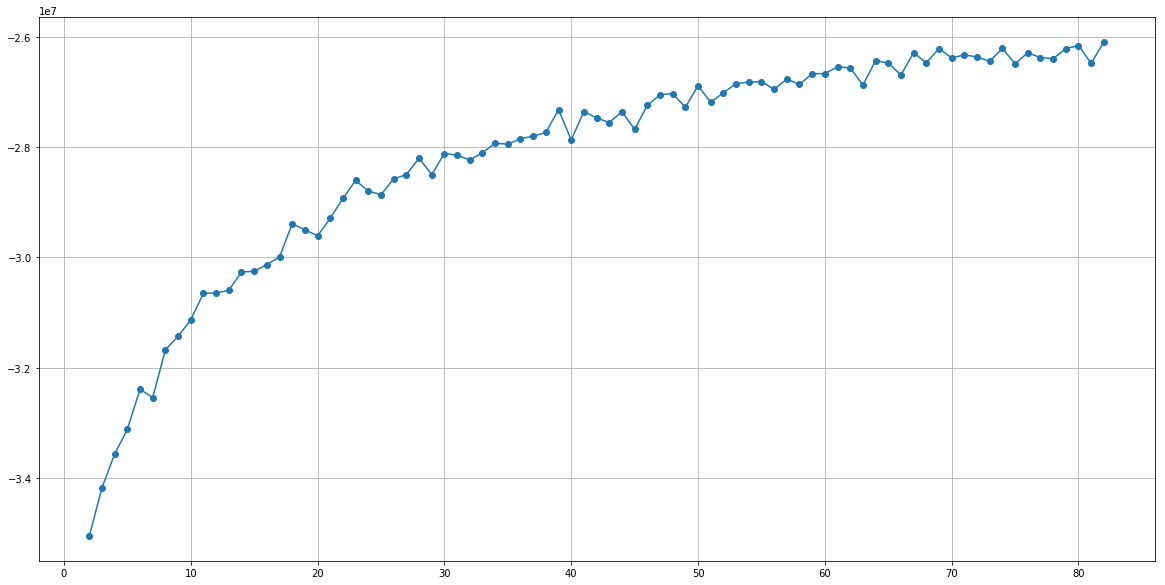

In [88]:
eta = 0.1
beta = 0.1

fig = plt.figure(figsize = (20,10))

dfplot = dfres[(dfres.eta == eta) & (dfres.beta == beta)]
plt.plot(dfplot.k, dfplot.score, 'o-')
    
plt.grid(True)

Perplexidade na amostra de teste variando número de componentes e $\eta$

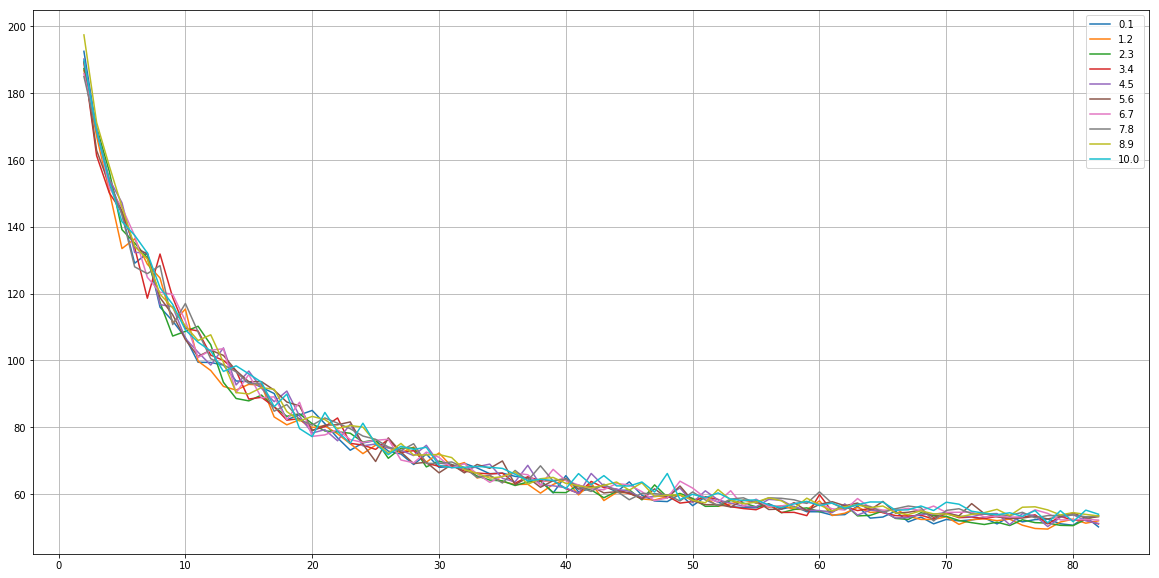

In [89]:
eta = 0.1
beta = 0.1

fig = plt.figure(figsize = (20,10))
for eta in dfres.eta.unique():
    dfplot = dfres[(dfres.eta == eta) & (dfres.beta == beta)]
    plt.plot(dfplot.k, dfplot.perp, label = eta)
    
plt.legend()
plt.grid(True)

Perplexidade na amostra de teste variando número de componentes e $\beta$

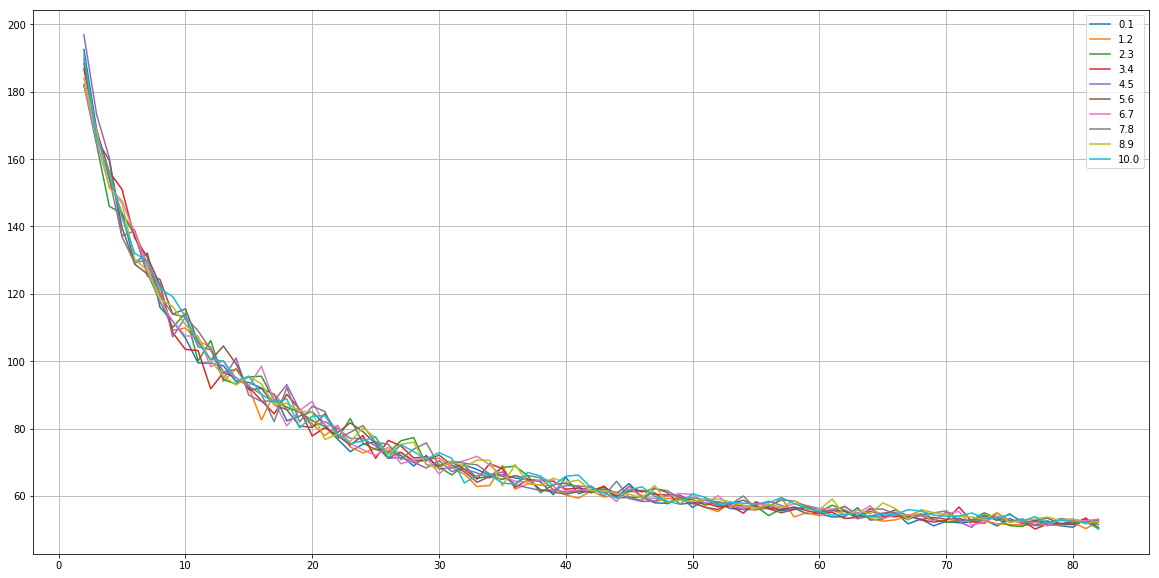

In [90]:
eta = 0.1
beta = 0.1

fig = plt.figure(figsize = (20,10))
for beta in dfres.beta.unique():
    dfplot = dfres[(dfres.eta == eta) & (dfres.beta == beta)]
    plt.plot(dfplot.k, dfplot.perp, label = beta)
    
plt.legend()
plt.grid(True)

AIC e BIC

Não funcionam direito devido à diferença de escala...

In [91]:
# Calculando AIC 
dfres['aic'] = 2*dfres.k*m - 2*dfres.score
# Calculando BIC
# O que é o tamanho de amostra aqui? O número de linhas de Mtest
dfres['bic'] = np.log(n)*dfres.k - 2*dfres.score

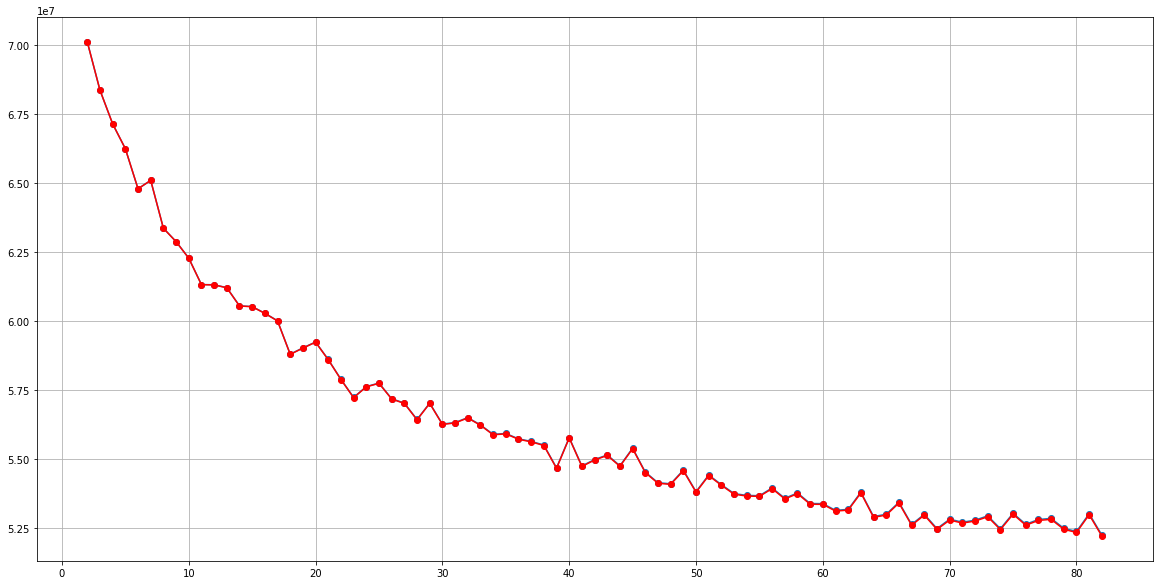

In [92]:
eta = 0.1
beta = 0.1

fig = plt.figure(figsize = (20,10))

dfplot = dfres[(dfres.eta == eta) & (dfres.beta == beta)]
plt.plot(dfplot.k, dfplot.aic, 'o-')
plt.plot(dfplot.k,-2*dfplot.score, 'o-', color = 'red')
    
plt.grid(True)

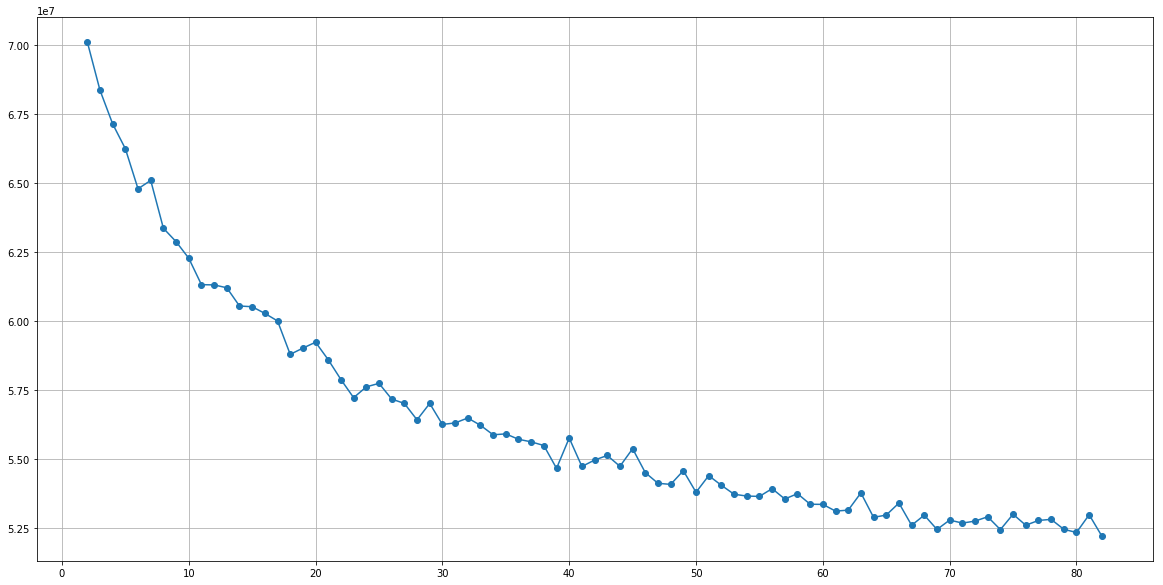

In [93]:
eta = 0.1
beta = 0.1

fig = plt.figure(figsize = (20,10))

dfplot = dfres[(dfres.eta == eta) & (dfres.beta == beta)]
plt.plot(dfplot.k, dfplot.bic, 'o-')
    
plt.grid(True)

# Testando esparsidade para dado k

In [94]:
# Variando eta
beta = 0.1
k = 10
etas = np.linspace(0.00001, 0.1, 10)
resnorm = []
for eta in etas:
    model = LDA(n_components = k, topic_word_prior = eta, doc_topic_prior = beta)
    model.fit(M)
    norm1_base = np.sum(np.abs(model.components_))
    resnorm.append(norm1_base)
    print("eta = {}, |c| = {}".format(eta, norm1_base))

C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 1e-05, |c| = 70264433.36148061


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.011120000000000001, |c| = 70264458.44485852


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.022230000000000003, |c| = 70264483.60384363


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.03334000000000001, |c| = 70264508.68846075


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.04445000000000001, |c| = 70264533.84118398


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.05556000000000001, |c| = 70264558.89662762


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.06667000000000001, |c| = 70264584.04969731


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.07778, |c| = 70264609.220164


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.08889000000000001, |c| = 70264634.26560824


C:\Users\C336682\AppData\Local\Continuum\anaconda\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


eta = 0.1, |c| = 70264659.40085001


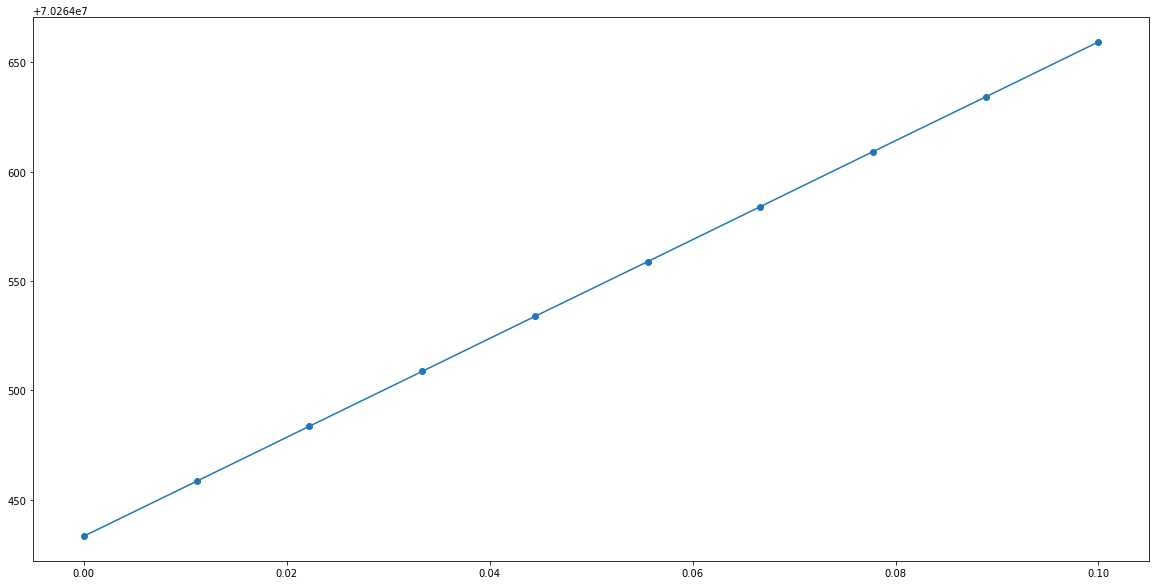

In [96]:
fig = plt.figure(figsize = (20, 10))
plt.plot(etas, resnorm, 'o-')

## Ajustando o modelo escolhido

### Testei com K=10, para ver o que acontece com menos componentes

In [291]:
%%time

eta = 1e-10
beta = 1e-1

k = 10

model = LDA(n_components = k, topic_word_prior = eta, doc_topic_prior = beta, verbose = 1, max_iter = 100, evaluate_every = 1, learning_decay = 0.9, n_jobs=-1, perp_tol=.01)
model.fit(M)

iteration: 1 of max_iter: 100, perplexity: 43.3238
iteration: 2 of max_iter: 100, perplexity: 37.7803
iteration: 3 of max_iter: 100, perplexity: 36.8139
iteration: 4 of max_iter: 100, perplexity: 36.2871
iteration: 5 of max_iter: 100, perplexity: 35.8617
iteration: 6 of max_iter: 100, perplexity: 35.7102
iteration: 7 of max_iter: 100, perplexity: 35.5776
iteration: 8 of max_iter: 100, perplexity: 35.5450
iteration: 9 of max_iter: 100, perplexity: 35.5247
iteration: 10 of max_iter: 100, perplexity: 35.4696
iteration: 11 of max_iter: 100, perplexity: 35.4505
iteration: 12 of max_iter: 100, perplexity: 35.4461
CPU times: user 2.5 s, sys: 99.4 ms, total: 2.6 s
Wall time: 11.2 s


$C$ é a matriz de base (as partes do eleitorado)

In [292]:
C = model.components_
C.shape

(10, 97)

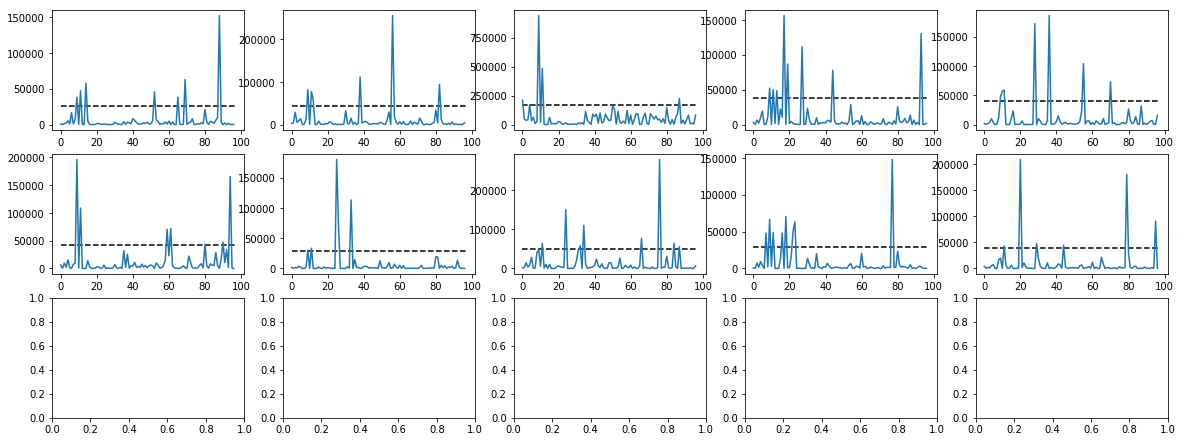

In [295]:
from matplotlib import pyplot as plt

C = model.components_

fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (20, 7.5))
axs = axs.ravel()

z = 1
for i in range(k):
    c = C[i,:]
    axs[i].plot(c)
    axs[i].hlines(y = c.mean() + z*c.std(), xmin = 0, xmax = C.shape[1], linestyles = 'dashed')
    

In [296]:
from scipy.special import entr

# Calculo da Entropia

# Normalizar os componentes para ter a distribuição de probabilidade 
# p contem cada distribuicao de cada componente de C

p = C/C.sum(axis=1, keepdims=True)

# Entropia para cada distribuicao p_i em p
entropy = (-p*np.log2(p)).sum(axis=1)

In [297]:
entropy

array([4.38085396, 4.45962028, 5.36508634, 4.62195923, 4.44599789,
       4.71578241, 3.8792564 , 4.58402207, 4.46064361, 4.04462009])

@paulo: O thresholding abaixo é controverso, por que já incluímos uma restrição de esparsidade forte no modelo original. Não tem problema que haja muitos candidatos por enquanto.

In [298]:
# Relacionar com os nomes

# estou filtrando aqueles com mais de 3 desvios padroes acima da media dos pesos dos componentes
# estou penalizando bastante aqui pois a distribuicao nesse caso tem entropia bastante alta no geral
# esse problema diminui com k=30, com o tradeoff de ter muito mais grupos

candidatos = M.columns
componentes = []

for weights in C:
    
    mask = weights > weights.mean() + z * weights.var() ** 0.5
    names = list(candidatos[mask])
    
    p = weights/weights.sum()
    p = p[mask]
    
    candidato_peso = dict(zip(names,p))
    
    componentes.append(candidato_peso)

In [299]:
import itertools
a = [list(a.keys()) for a in componentes]
unique_data = list(itertools.chain(*a))
print("{} candidatos no total dos componentes".format(len(set(unique_data))))

49 candidatos no total dos componentes


In [300]:
componentes

[{'CELSO RUSSOMANNO': 0.059403944675273976,
  'TIRIRICA': 0.07318341089926565,
  'DELEGADA GRACIELA': 0.08961884940777197,
  'VANDERLEI SIRAQUE': 0.07071787443301356,
  'DR UBIALI': 0.05939586856066739,
  'VICENTINHO': 0.09761273616266526,
  'ALEX MANENTE': 0.23601501366800443},
 {'CELSO RUSSOMANNO': 0.07490229430446461,
  'TIRIRICA': 0.07094338265392777,
  'GUILHERME CAMPOS': 0.053011332009657845,
  'ANA PERUGINI': 0.1021868389161491,
  'CARLOS SAMPAIO': 0.23423544500580915,
  'LUIZ LAURO FILHO': 0.08631335609900925},
 {'RICARDO TRIPOLI': 0.03777722172271151,
  'PAULO MALUF': 0.030967153209344442,
  'CELSO RUSSOMANNO': 0.1691701759530442,
  'TIRIRICA': 0.08698972421599722,
  'BRUNO COVAS': 0.040527098398157976},
 {'CELSO RUSSOMANNO': 0.04871194465735158,
  'TIRIRICA': 0.04690101671149968,
  'DR SINVAL MALHEIROS': 0.045563421186213766,
  'MIGUEL HADDAD': 0.14625016540453675,
  'THAME': 0.08117773320525595,
  'MILTON MONTI': 0.10439915535438421,
  'ARNALDO JARDIM': 0.07277366857611865,


## K=30

In [279]:
%%time

k = 30

model = LDA(n_components = k, topic_word_prior = eta, doc_topic_prior = beta, verbose = 1, max_iter = 100, evaluate_every = 1, learning_decay = 0.9, n_jobs=-1, perp_tol=.01)
model.fit(M)

iteration: 1 of max_iter: 100, perplexity: 36.4392
iteration: 2 of max_iter: 100, perplexity: 30.5896
iteration: 3 of max_iter: 100, perplexity: 29.2971
iteration: 4 of max_iter: 100, perplexity: 28.5763
iteration: 5 of max_iter: 100, perplexity: 28.0604
iteration: 6 of max_iter: 100, perplexity: 27.8396
iteration: 7 of max_iter: 100, perplexity: 27.7168
iteration: 8 of max_iter: 100, perplexity: 27.6366
iteration: 9 of max_iter: 100, perplexity: 27.4503
iteration: 10 of max_iter: 100, perplexity: 27.3221
iteration: 11 of max_iter: 100, perplexity: 27.2790
iteration: 12 of max_iter: 100, perplexity: 27.2512
iteration: 13 of max_iter: 100, perplexity: 27.2290
iteration: 14 of max_iter: 100, perplexity: 27.2111
iteration: 15 of max_iter: 100, perplexity: 27.1972
iteration: 16 of max_iter: 100, perplexity: 27.1865
iteration: 17 of max_iter: 100, perplexity: 27.1778
CPU times: user 4.52 s, sys: 66.9 ms, total: 4.59 s
Wall time: 14.5 s


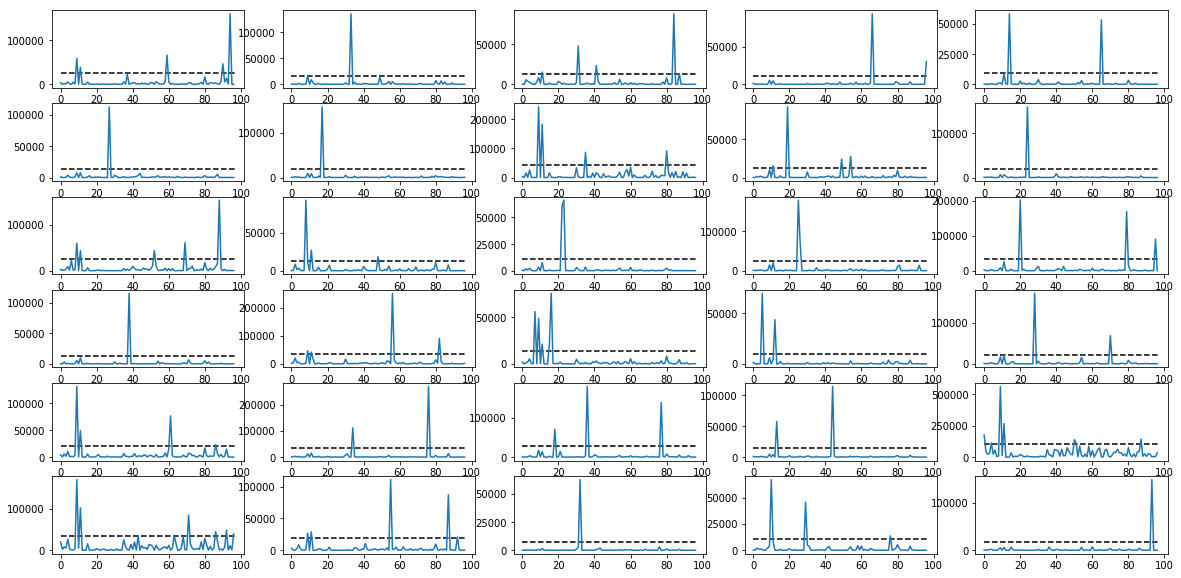

In [285]:
C = model.components_

fig, axs = plt.subplots(nrows = 6, ncols = 5, figsize = (20, 10))
axs = axs.ravel()

z = 1
for i in range(k):
    c = C[i,:]
    axs[i].plot(c)
    axs[i].hlines(y = c.mean() + z*c.std(), xmin = 0, xmax = C.shape[1], linestyles = 'dashed')

In [286]:
p = C/C.sum(axis=1, keepdims=True)
entropy = (-p*np.log2(p)).sum(axis=1)

entropy

array([4.03544595, 3.09386506, 3.67802428, 2.57533006, 2.87936088,
       3.08294749, 2.62012606, 4.25218185, 3.37724479, 2.25256865,
       4.37618918, 3.63920767, 2.90427724, 3.18531817, 3.20774835,
       2.57233382, 3.80878538, 3.88710464, 2.85581943, 3.2547144 ,
       4.27025832, 2.60289742, 3.05551636, 2.56314397, 5.34316709,
       5.06700719, 3.87475071, 2.11027134, 3.57672   , 2.66093734])

In [287]:
candidatos = M.columns
componentes = []

for weights in C:
    
    # menor penalizacao pro filtro, apenas acima de 1.5 desvios acima da media
    mask = weights > weights.mean() + z * weights.var() ** 0.5
    names = list(candidatos[mask])
    
    p = weights/weights.sum()
    p = p[mask]
    
    candidato_peso = dict(zip(names,p))
    
    componentes.append(candidato_peso)

In [250]:
import itertools
a = [list(a.keys()) for a in componentes]
unique_data = list(itertools.chain(*a))
print("{} candidatos no total dos componentes".format(len(set(unique_data))))

56 candidatos no total dos componentes


In [288]:
componentes

[{'CELSO RUSSOMANNO': 0.1058731988065885,
  'TIRIRICA': 0.07018098615050482,
  'VALMIR PRASCIDELLI': 0.11959982182582032,
  'ROGERIO LINS': 0.08406723944687869,
  'BRUNA FURLAN': 0.28930052029170406},
 {'VANDERLEI MACRIS': 0.554324378249378},
 {'TIRIRICA': 0.057368127419656384,
  'LUIZ CARLOS MOTTA': 0.1792482226924082,
  'MAJOR OLIMPIO GOMES': 0.08736271998717302,
  'EVANDRO GUSSI': 0.33017131341723766,
  'BRUNO COVAS': 0.05071899723534479},
 {'NELSON MARQUEZELLI': 0.5607370979578314,
  'ALEXANDRE LEITE': 0.18105630473179524},
 {'DELEGADA GRACIELA': 0.3760497023092031, 'DR UBIALI': 0.34271102251115415},
 {'MILTON MONTI': 0.5862919761374421},
 {'MIGUEL HADDAD': 0.6642820539528483},
 {'CELSO RUSSOMANNO': 0.22636325948618982,
  'TIRIRICA': 0.17103167890952412,
  'PAULINHO DA FORÇA': 0.08085361742514964,
  'PASTOR MARCO FELICIANO': 0.08546384773482044},
 {'TIRIRICA': 0.06870389919970446,
  'THAME': 0.40874794699755235,
  'JOSÉ MENTOR': 0.10602656771532534,
  'JEFFERSON CAMPOS': 0.12258016

In [ ]:
# TODO: calcular entropia de cada componente... analisar as de entropia mais baixa
# TODO: analisar versus partido

As ativações (ou participação de cada parte na votação de cada município)

In [23]:
A = model.transform(M)
A.shape

(645, 30)

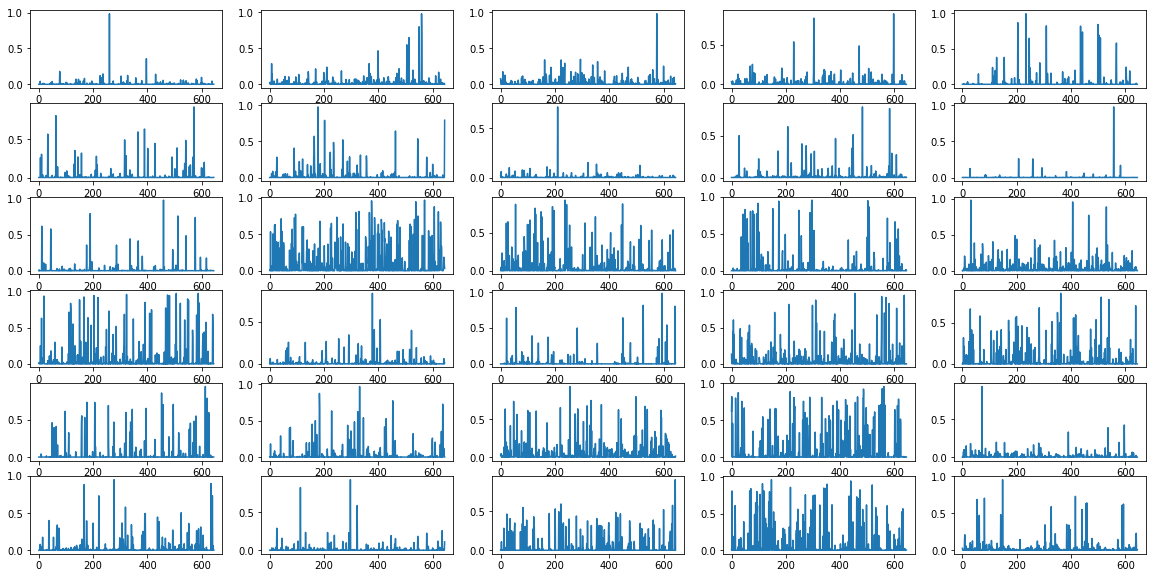

In [24]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows = 6, ncols = 5, figsize = (20, 10))
axs = axs.ravel()

for i in range(k):
    a = A[:, i]
    axs[i].plot(a)